In [68]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def fuse_images(ms_img, pan_img, alpha):
    """ Fuse multispectral (MS) image with panchromatic (PAN) image using HSV color space. """
    ms_img_hsv = cv2.cvtColor(ms_img, cv2.COLOR_RGB2HSV)
    H, S, I = cv2.split(ms_img_hsv)
    pan_img_resized = pan_img.astype(np.float32)
    pan_img_resized = cv2.resize(pan_img_resized, (I.shape[1], I.shape[0]), interpolation=cv2.INTER_LINEAR)
    pan_img_resized = np.clip(pan_img_resized, 0, 255)

    I_fused = (1 - alpha) * I + alpha * pan_img_resized
    I_fused = np.clip(I_fused, 0, 255).astype(np.uint8)
    fused_hsv = cv2.merge([H, S, I_fused])
    fused_rgb = cv2.cvtColor(fused_hsv, cv2.COLOR_HSV2RGB)

    return fused_rgb

ms_image = cv2.imread('/content/FINALLLLLL.jpg')
pan_image = cv2.imread('/content/36153a41-b030-4818-a2e2-c13d57f49b25-2.jpg', cv2.IMREAD_GRAYSCALE)

ms_image_rgb = cv2.cvtColor(ms_image, cv2.COLOR_BGR2RGB)
ms_image_resized = cv2.resize(ms_image_rgb, (pan_image.shape[1], pan_image.shape[0]), interpolation=cv2.INTER_LINEAR)
ms_image_resize = cv2.resize(ms_image_resized, (1024, 1024), interpolation=cv2.INTER_LINEAR)

pan_image_resize = cv2.resize(pan_image, (1024, 1024), interpolation=cv2.INTER_LINEAR)
fused_image = fuse_images(ms_image_resize, pan_image_resize, alpha=0.5)




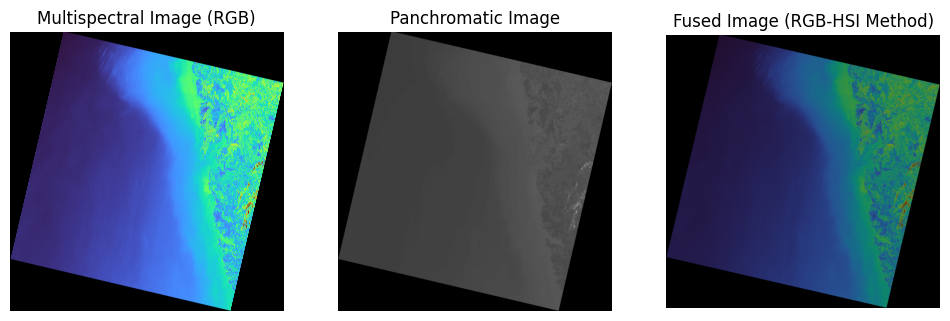

In [70]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(ms_image_rgb)
plt.title("Multispectral Image (RGB)")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(pan_image, cmap='gray')
plt.title("Panchromatic Image")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(fused_image)
plt.title("Fused Image (RGB-HSI Method)")
plt.axis('off')

plt.show()
